<a href="https://colab.research.google.com/github/shebogholo/pytorch/blob/master/Feed-forward%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/shebogholo/pytorch/blob/master/images/feed-forward.png?raw=1' />

## Import libraries

In [0]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transform

## Load dataset

In [0]:
train_dataset = dataset.MNIST(root='data', train=True, transform=transform.ToTensor(), download=True)
test_dataset  = dataset.MNIST(root='data', train=False, transform=transform.ToTensor())

In [3]:
print('Train data: ',len(train_dataset))
print('Test  data: ',len(test_dataset))

Train data:  60000
Test  data:  10000


## Make dataset iterable

#### We need to split these 60000 training samples (images) into small groups(batches) and pass these batches into our model. 
Why do we have to split the data:-
- Passing the whole dataset requires a lot of RAM of your CPU/GPU. (Out-Of-Memory)
- Passing the whole dataset cause unstable training as a result of accumulating all the error and update model parameters once rather than updating gradually.

## Epoch
Hyperparameter that define the number of times the learning algorithm will work through the entire dataset.
One Epoch is when the entire dataset is passed forward and backward only once.

### Batch size
The number of examples present in a single batch, i.e examples to work through before updating internal model parameters.

### Iterations
It define the number of baches needed to complete one epoch.

In [0]:
batch_size = 64
num_epochs = 10
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [0]:
# function to show an image
def show_image(image):
  image = image.numpy()
  plt.imshow(np.transpose(image, (1, 2, 0)))

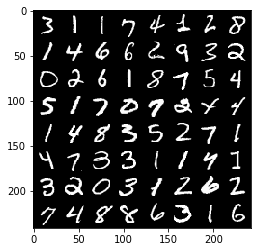

In [6]:
# get random training images
images, labels = iter(train_loader).next()
show_image(torchvision.utils.make_grid(images))

## Define a Model

In [0]:
class Network(nn.Module):
    def __init__(self, input_dimension, hidden_dimension, output_dimension):
        super(Network, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dimension, hidden_dimension) 
        # Non-linearity
        self.activation_function = nn.ReLU()
        # Linear function
        self.fc2 = nn.Linear(hidden_dimension, output_dimension)  

    def forward(self, x):
        output = self.fc1(x)
        # Non-linearity
        output = self.activation_function(output)
        # Linear function
        output = self.fc2(output)
        return output

#### Instantiate amodel
- Input dimention:  28*28   Size of image
- Hidden dimension: 150     Number of neurons
- Output dimension: 10      Number of classes

In [0]:
input_dimension  = 784
hidden_dimension = 150
output_dimension = 10

In [0]:
# model = Network(28*28, 150, 10)
model = Network(input_dimension, hidden_dimension, output_dimension)

In [10]:
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=150, bias=True)
  (activation_function): ReLU()
  (fc2): Linear(in_features=150, out_features=10, bias=True)
)


## Define Loss function
In this classification problem, we'll use cross entropy loss to compute the loss between softmax output and the actual labels.

In [0]:
criterion = nn.CrossEntropyLoss()

## Define Optimizer
Optimizer choose a way to update model parameters in order to converge to find the best weights and biases for the Network.
`Learning rate` is a hyperparameter that controls how much we'are adjusting the parameters of the model with respect to the gradient of the loss function.

In [0]:
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## Train a Model

In [15]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output
        outputs = model(images)

        # Calculate Loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {:.4f}. Test accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1000. Loss: 0.2124. Test accuracy: 93
Iteration: 2000. Loss: 0.2478. Test accuracy: 93
Iteration: 3000. Loss: 0.1656. Test accuracy: 93
Iteration: 4000. Loss: 0.3579. Test accuracy: 93
Iteration: 5000. Loss: 0.3502. Test accuracy: 93
Iteration: 6000. Loss: 0.2470. Test accuracy: 93
Iteration: 7000. Loss: 0.3249. Test accuracy: 93
Iteration: 8000. Loss: 0.1054. Test accuracy: 93
Iteration: 9000. Loss: 0.1341. Test accuracy: 93
